<a href="https://colab.research.google.com/github/dla9944/myPyCode/blob/main/221223_4_Machine_Learning_XGBoost_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 XGBoost 설명

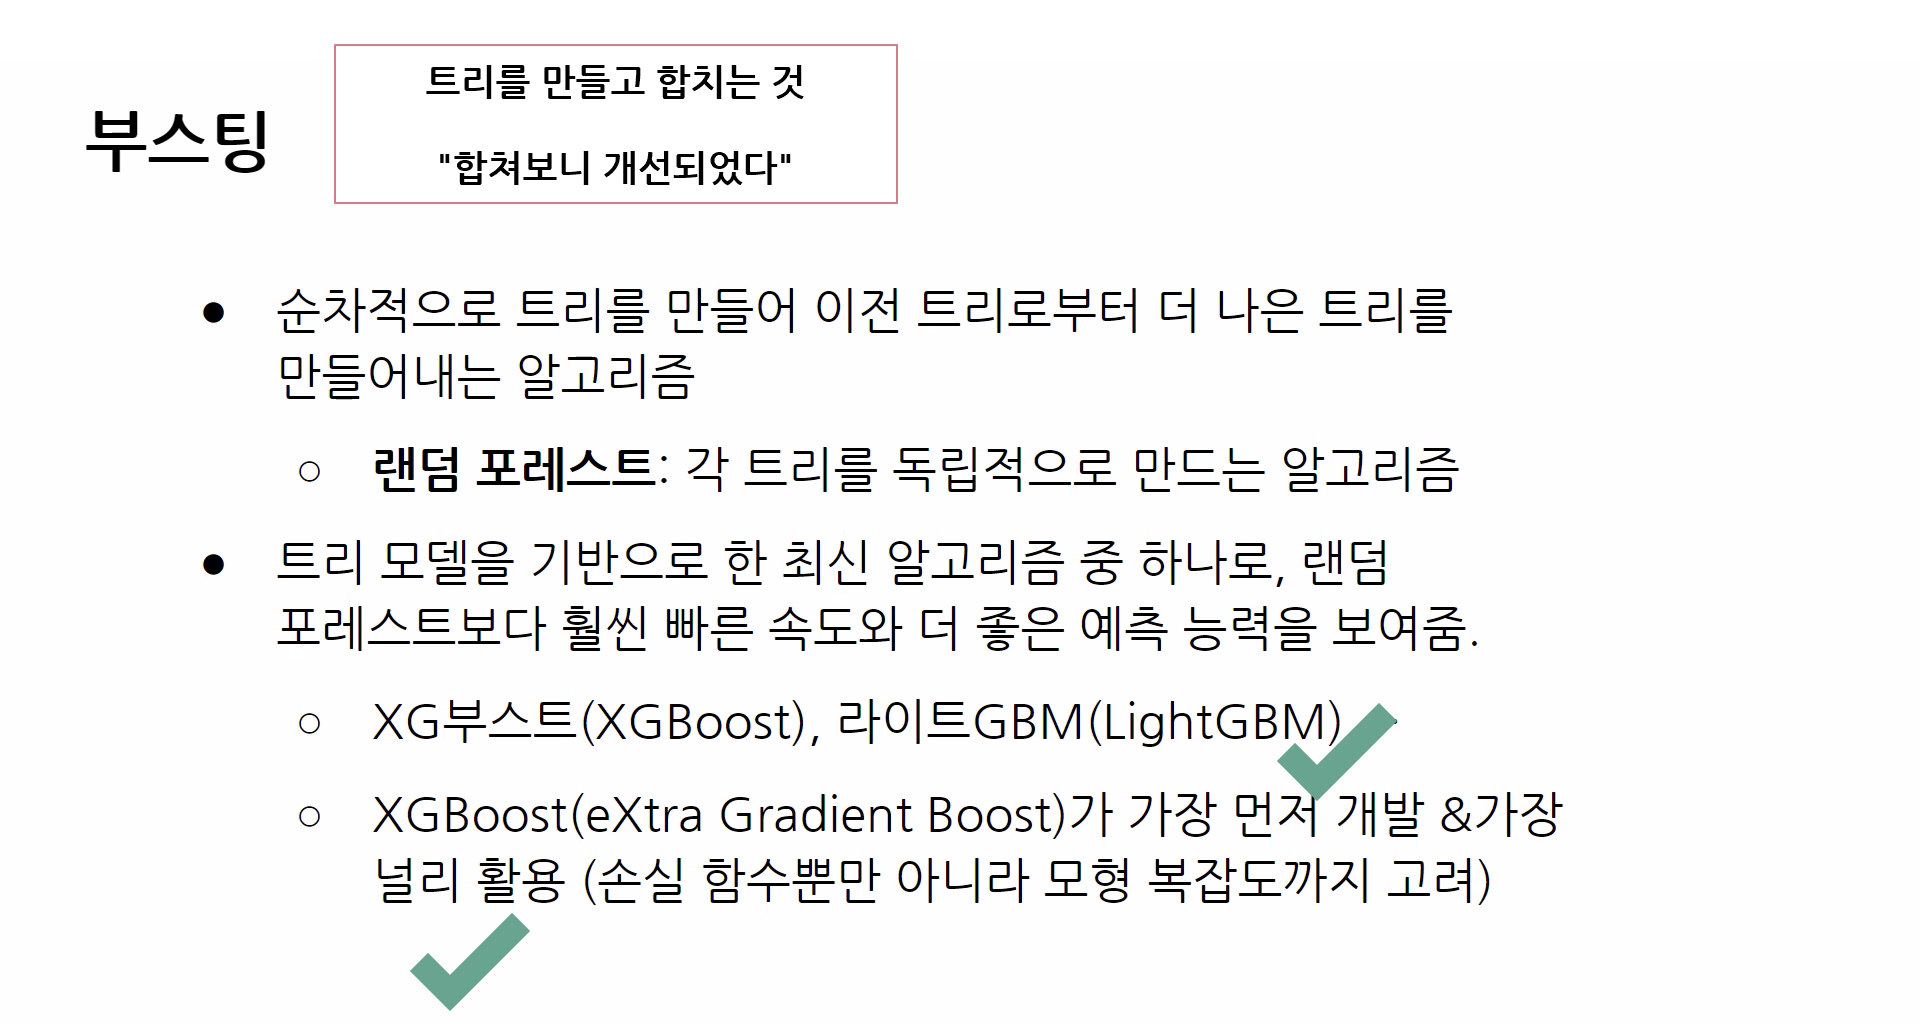

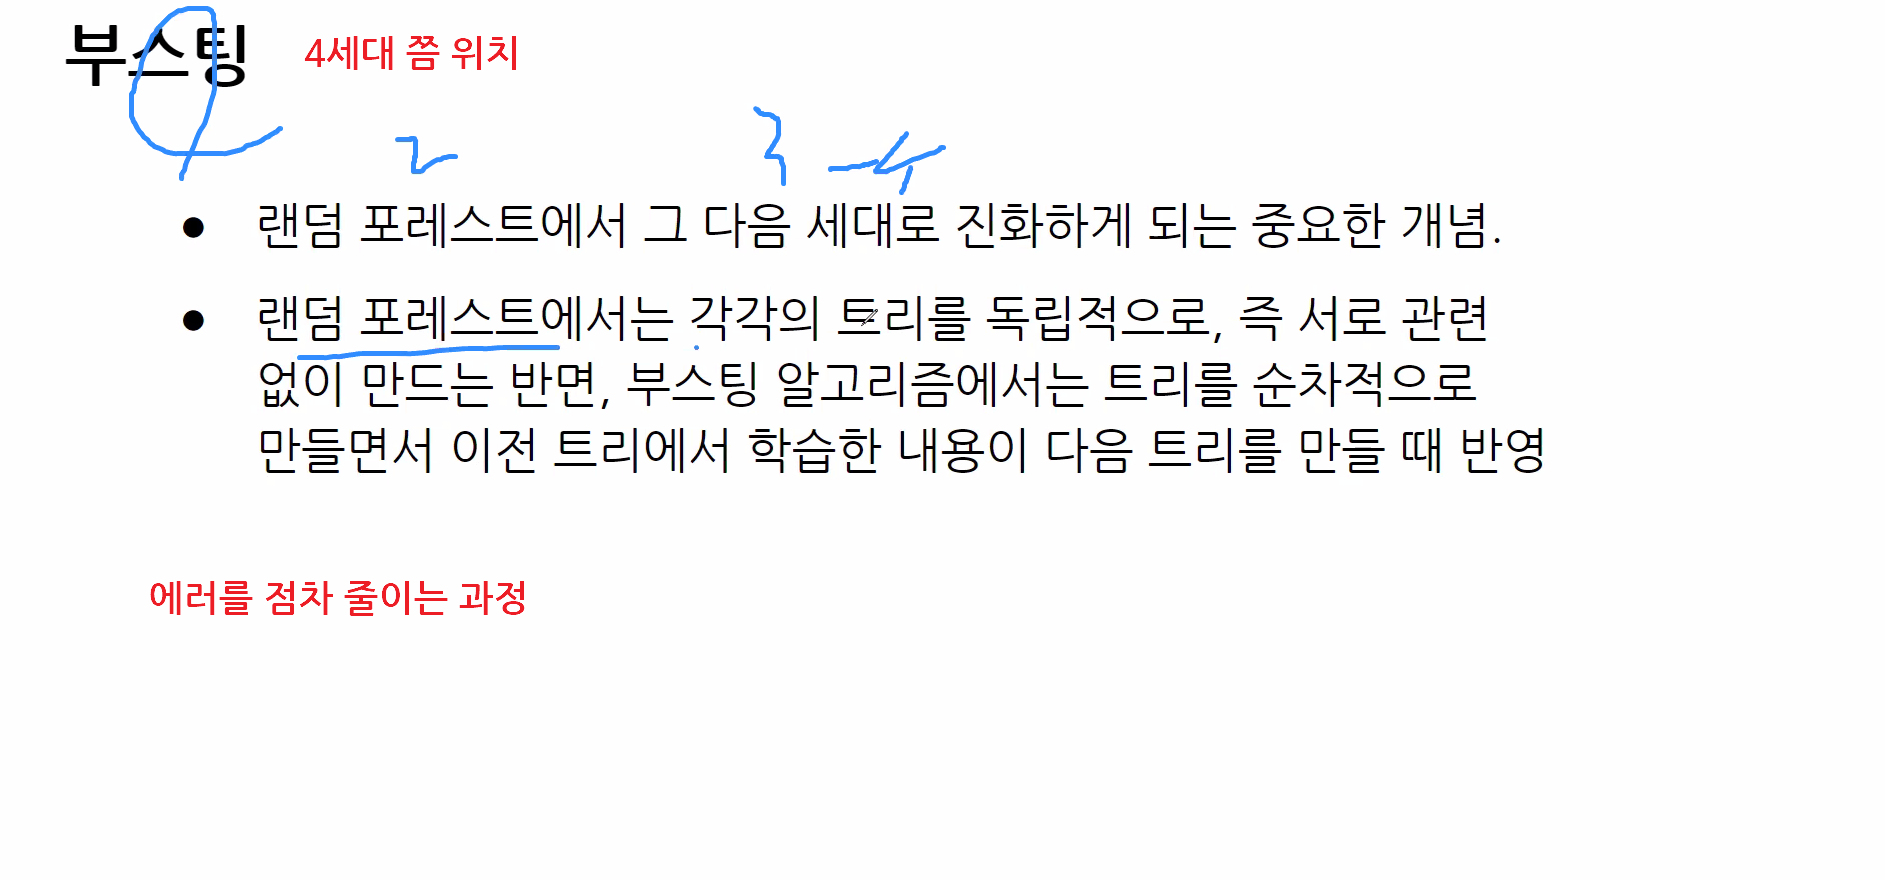

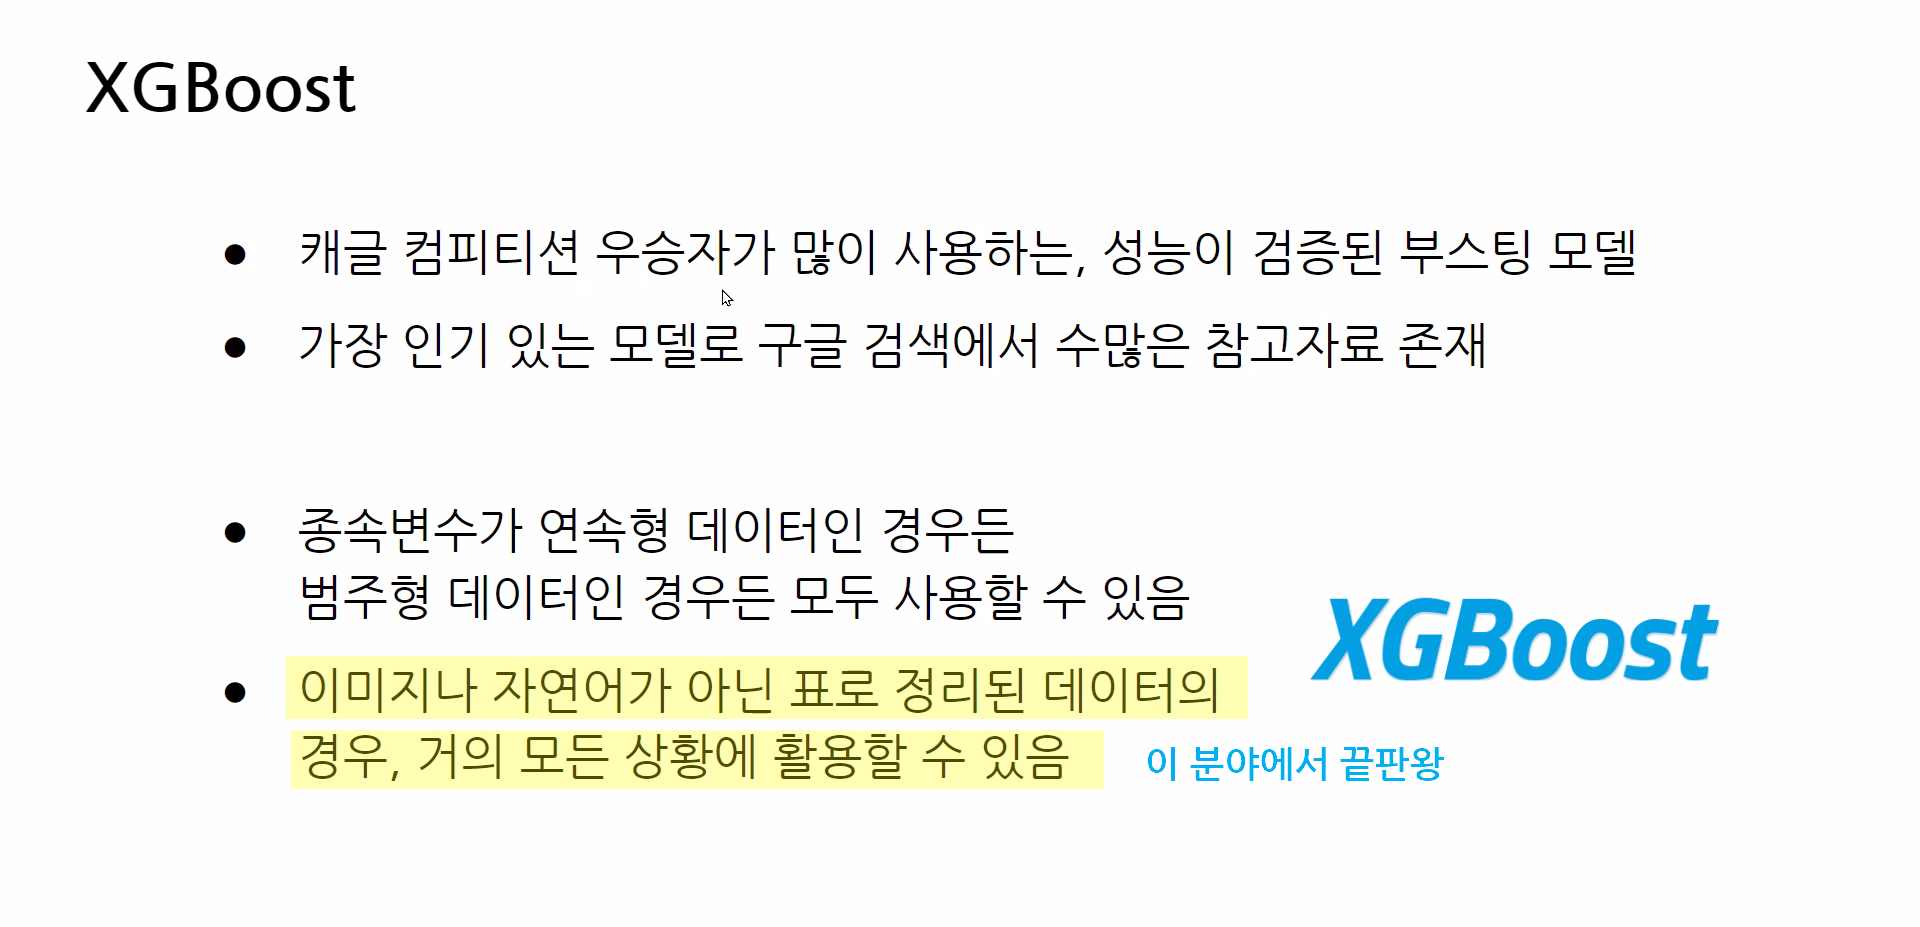

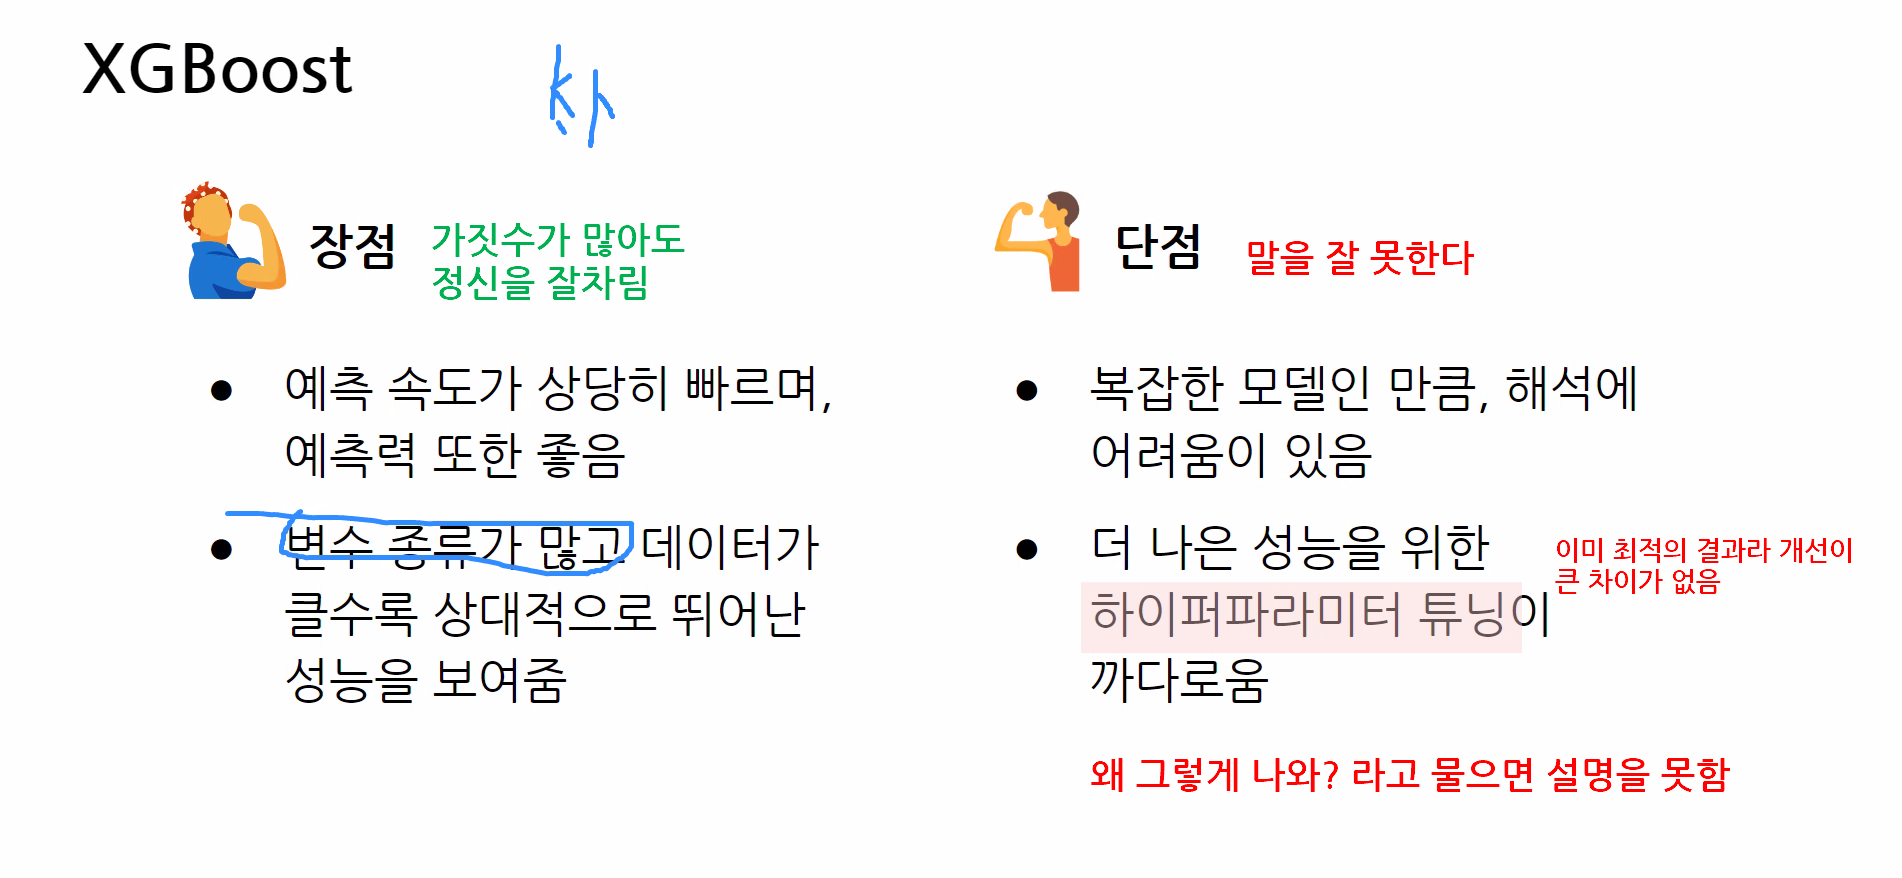

# 💑 실제 데이터 - XGBoost로 커플 성사 예측

In [1]:
# 필요한 라이브러리 호출

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb # !pip install xgboost도 필요

In [2]:
# 캐글 데이터 조회

# https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment

df = pd.read_csv('dating.csv', encoding = 'cp949')
df

FileNotFoundError: ignored

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/dating.csv')
df

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,...,5.0,NaN,NaN,0.64,10.0,NaN,2.0,5.0,0.0,0
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,...,4.0,4.0,NaN,0.71,10.0,NaN,4.0,4.0,0.0,0
8375,1,male,25.0,29.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,40.0,10.0,...,8.0,8.0,NaN,-0.46,10.0,NaN,6.0,5.0,0.0,0
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,...,4.0,NaN,5.0,0.62,10.0,NaN,5.0,5.0,0.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [11]:
df.describe()

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00000,8283.000000,8274.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,...,8028.000000,7666.000000,7311.000000,8220.000000,8277.000000,1800.000000,8138.000000,8069.000000,8003.000000,8378.000000
mean,0.87491,26.358928,26.364999,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,...,6.400598,6.777524,5.474559,0.196010,5.534131,5.570556,6.134087,5.207523,0.049856,0.164717
std,0.33084,3.566763,3.563648,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,...,1.953702,1.794055,2.156363,0.303539,1.734059,4.762569,1.841285,2.129565,0.282168,0.370947
min,0.00000,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,24.000000,24.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,...,5.000000,6.000000,4.000000,-0.020000,5.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,1.00000,26.000000,26.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,...,7.000000,7.000000,6.000000,0.210000,6.000000,4.000000,6.000000,5.000000,0.000000,0.000000
75%,1.00000,28.000000,28.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,15.000000,...,8.000000,8.000000,7.000000,0.430000,7.000000,8.000000,7.000000,7.000000,0.000000,0.000000
max,1.00000,55.000000,55.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,10.000000,10.000000,8.000000,1.000000


## 🔮 변수 목록
* has_null
    - 변수 중 Null값이 있는지 여부. 단, 이 데이터는 기존 데이터에서 일부 변수들이 생략된 축소판이기 때문에, 여기서 보이는 Null값 여부와 다소 차이가 있을 수 있음.
    - 전반적으로 무응답 항목이 있는지에 대한 정보이므로 그대로 사용
* age / age_o : age는 본인 나이이며 age_o는 상대방 나이.
* race / race_o : 마찬가지로 본인과 상대의 인종 정보.
* importance_same_race / importance_same_religion
    * 인종과 종교를 중요시 여기는지에 대한 응답
* attractive(매력적인), sincere(성실한), intelligence(지적), funny(재미난), ambitious(야심찬), shared_ interests(공통관심사) : 이 항목들은 4가지 관점에서 평가되어 총 변수가 24(6 × 4)개
    * pref_o_xxx( 예 : pref_o_attractive) : 상대방이 xxx 항목을 얼마나 중요하게 생각하는가에 대한 응답
    * xxx_o(예: attractive_o) : 상대방이 본인에 대한 xxx 항목을 평가한 항목
    * xxx_important(예 : attractive_important) : xxx 항목에 대해 본인이 얼마나 중요하게 생각하는가에 대한 응답
    * xxx_partner(예 : attractive_partner) : 본인이 상대방에 대한 xxx 항목을 평가한 항목
* interests_correlate : 관심사(취미 등) 연관도
* expected_happy_with_sd_people : 스피드 데이팅을 통해 만난 사람과 함께할 때 얼마나 좋을
지에 대한 기대치
* expected_num_interested_in_me : 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
* like : 파트너가 마음에 들었는지 여부
* guess_prob_liked : 파트너가 나를 마음에 들어했을지에 대한 예상
* met: 파트너를 스피드 데이팅 이벤트 이전에 만난 적이 있는지 여부
* match : 성사되었는지 여부

In [12]:
# 종속변수 y 는 match(성사 여부)
# 독립변수 X 는 match외 필요한 피쳐 전부

In [13]:
# 소숫점 축약
pd.options.display.float_format = "{:.2f}".format

In [14]:
df.describe()

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,...,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,...,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,...,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,...,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,...,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,...,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,...,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [15]:
df.describe(include='O')

,gender,race,race_o
count,8378,8315,8305
unique,2,5,5
top,male,European/Caucasian-American,European/Caucasian-American
freq,4194,4727,4722


# 📊 데이터 전처리 시작

## 🔐 결측치부터 확인 시작

In [16]:
df.isnull().mean()

has_null                        0.00
gender                          0.00
age                             0.01
age_o                           0.01
race                            0.01
race_o                          0.01
importance_same_race            0.01
importance_same_religion        0.01
pref_o_attractive               0.01
pref_o_sincere                  0.01
pref_o_intelligence             0.01
pref_o_funny                    0.01
pref_o_ambitious                0.01
pref_o_shared_interests         0.02
attractive_o                    0.03
sincere_o                       0.03
intelligence_o                  0.04
funny_o                         0.04
ambitous_o                      0.09
shared_interests_o              0.13
attractive_important            0.01
sincere_important               0.01
intellicence_important          0.01
funny_important                 0.01
ambtition_important             0.01
shared_interests_important      0.01
attractive_partner              0.02
s

In [17]:
df.isnull().mean().sort_values(ascending = False) # 내림차순 정렬

expected_num_interested_in_me   0.79
shared_interests_o              0.13
shared_interests_partner        0.13
ambitous_o                      0.09
ambition_partner                0.08
met                             0.04
funny_o                         0.04
funny_partner                   0.04
guess_prob_liked                0.04
intelligence_o                  0.04
intelligence_partner            0.04
sincere_o                       0.03
sincere_partner                 0.03
like                            0.03
attractive_o                    0.03
attractive_partner              0.02
interests_correlate             0.02
pref_o_shared_interests         0.02
shared_interests_important      0.01
pref_o_ambitious                0.01
age_o                           0.01
expected_happy_with_sd_people   0.01
ambtition_important             0.01
pref_o_funny                    0.01
age                             0.01
pref_o_sincere                  0.01
pref_o_attractive               0.01
f

In [18]:
# 특정한 부분집합만 nan 삭제 처리
# subset = [삭제할 행 이름]


# 상대적으로 불필요한 변수 결측치 삭제 (importance, preference 등)

subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
            'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
            'attractive_important', 'sincere_important', 'intellicence_important',
            'funny_important', 'ambtition_important', 'shared_interests_important']

In [19]:
# subset으로 삭제 (주의)
df = df.dropna(
    subset=[
        'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
        'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
        'attractive_important', 'sincere_important', 'intellicence_important',
        'funny_important', 'ambtition_important', 'shared_interests_important']
)

In [20]:
df.isnull().mean().sort_values(ascending = False)
#df.isna().mean().sort_values(ascending=False) # 동일함

expected_num_interested_in_me   0.79
shared_interests_o              0.13
shared_interests_partner        0.13
ambitous_o                      0.08
ambition_partner                0.08
met                             0.04
funny_o                         0.04
funny_partner                   0.04
guess_prob_liked                0.04
intelligence_o                  0.03
intelligence_partner            0.03
sincere_o                       0.03
sincere_partner                 0.03
like                            0.03
attractive_partner              0.02
attractive_o                    0.02
age_o                           0.00
age                             0.00
expected_happy_with_sd_people   0.00
funny_important                 0.00
interests_correlate             0.00
shared_interests_important      0.00
ambtition_important             0.00
has_null                        0.00
intellicence_important          0.00
sincere_important               0.00
attractive_important            0.00
g

In [21]:
# 결측치를 모두 -99로 채워주기
# 주의
df.fillna(-99, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
# 결측치 처리 완료
df.isna().mean().sort_values(ascending=False)

has_null                        0.00
funny_partner                   0.00
intellicence_important          0.00
funny_important                 0.00
ambtition_important             0.00
shared_interests_important      0.00
attractive_partner              0.00
sincere_partner                 0.00
intelligence_partner            0.00
ambition_partner                0.00
attractive_important            0.00
shared_interests_partner        0.00
interests_correlate             0.00
expected_happy_with_sd_people   0.00
expected_num_interested_in_me   0.00
like                            0.00
guess_prob_liked                0.00
met                             0.00
sincere_important               0.00
shared_interests_o              0.00
gender                          0.00
pref_o_sincere                  0.00
age                             0.00
age_o                           0.00
race                            0.00
race_o                          0.00
importance_same_race            0.00
i

In [23]:
df2 = df.copy()

# 👨‍💻 교수 사례 - xgboost를 임의로 사용한 경우

In [24]:
df2.describe(include='O').columns

df2 = pd.get_dummies(df2, columns=df2.describe(include='O').columns)

X = df2.drop('match', axis=1)
y = df2['match']

from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(
    X, y, test_size=0.2, random_state=230
)

model = xgb.XGBClassifier(random_state=23)
model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

# 정확성 점수

0.861469864698647

[[5223  240]
 [ 661  380]]


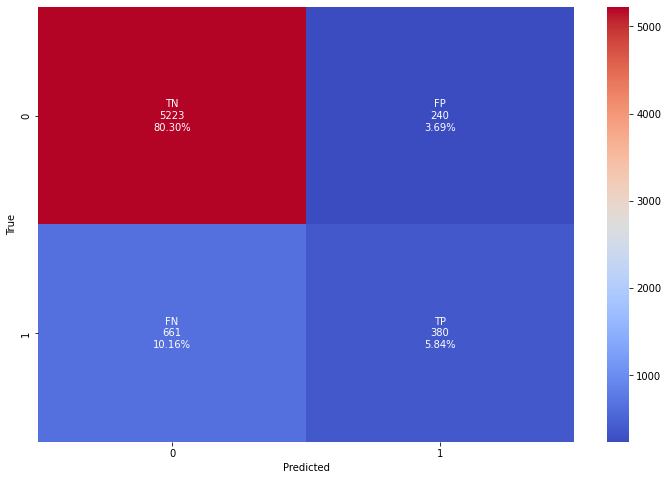

In [25]:
from sklearn.metrics import confusion_matrix

# 오른쪽 위 : 1종 오류 - 실제 틀린데 (0) 맞다고 예측 (1) - 68
# 왼쪽 아래 : 2종 오류 - 실제 맞는데 (1) 틀리다고 예측 (0) - 147
print(confusion_matrix(y_test, pred))
cf_matrix = confusion_matrix(y_test,pred)
cf_matrix
plt.figure(figsize=(12, 8))
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()
# TP(양성을 양성으로 판단)
# FN(양성을 음성으로 판단) -> 2종 오류 (맞는데 틀리다고)
# FP(음성을 양성으로 판단) -> 1종 오류 (틀린데 맞다고)
# TN(음성을 음성으로 판단) 

# 🤸‍♂️ 피쳐 엔지니어링

* feature(피쳐) : 독립변수, 특징을 의미함
* engineering(공학) : 가공을 해서 더 유의미하게 만들겠다는 뜻

---------------------------------------
* 단위는 통일하고, 이름은 의미있는 것만 남긴다👨‍🔬

## 👨‍🦳 age_gap 부터 처리시작 + gender 도 고려

In [26]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match'],
      dtype='object')

In [27]:
(df.age == -99).mean() # 내 나이 결측치

0.002706027060270603

In [28]:
(df.age_o == -99).mean() # 상대방 나이 결측치

0.002706027060270603

In [29]:
# 1. 내 나이가 결측치일 경우 -> 결측치
# 2. 상대방의 나이가 결측치일 경우 -> 결측치
# 3. 상대방과 내 나이가 모두 있을 경우 (차이를 구할 수 있음)
# 3-1. (내가 남성) : 상대방과 나이 차이 -> 내 나이에서 상대방 나이를 빼고
# 3-2. (내가 여성) : 상대방과 나이 차이 -> 상대방 나이에서 내 나이를 빼는 방식
# df.apply(데이터, axis=1) -> 특정 행의 전체 열


In [30]:
# 성별에 따라 나이차를 구분해준 경우
def age_gap(row):
    if row.age == -99: return -99 # 1. 내 나이가 결측치(-99)일 경우 # return => 함수가 뒤를 더 이상 처리 안합니다.
    if row.age_o == -99: return -99 # 2. 상대방 나이가 -99일 경우
    if row.gender == 'male': return row.age - row.age_o # 3-1. 남성일 경우 -> 내 나이 - 상대방 나이
    if row.gender == 'female': return row.age_o - row.age # 3-2. 여성일 경우 -> 상대방 나이 - 내 나이. 나머지 값은 없음

In [31]:
df['age_gap'] = df.apply(age_gap, axis=1) # 행을 기준으로 모든 열을 사용해주려면 사용

<ipython-input-31-533de59757cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_gap'] = df.apply(age_gap, axis=1) # 행을 기준으로 모든 열을 사용해주려면 사용


In [32]:
# 나이 차 + 성별간의 차이
df.age_gap.head()

0   6.00
1   1.00
2   1.00
3   2.00
4   3.00
Name: age_gap, dtype: float64

In [33]:
# 나이 차 만 보는경우
# abs : 절대값 -> 성별의 영향 없이 진짜 나이 차이만 보겠다


In [34]:
def age_gap_abs(row):
    if row.age == -99: return -99 # 1. 내 나이가 결측치(-99)일 경우 # return => 함수가 뒤를 더 이상 처리 X
    if row.age_o == -99: return -99 # 2. 상대방 나이가 -99일 경우
    return abs(row.age - row.age_o) # 3. 둘 사이의 차이를 abs() -> 절대값으로 나타내기

In [35]:
df['age_gap_abs'] = df.apply(age_gap_abs, axis=1) # 행을 기준으로 모든 열을 사용해주려면 사용

<ipython-input-35-daf689b699a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_gap_abs'] = df.apply(age_gap_abs, axis=1) # 행을 기준으로 모든 열을 사용해주려면 사용


In [36]:
# 성별간 나이차이는 음수도 있다 
# 음수는 내가 남성인데 상대 나이(여성)> 내 나이인 경우와 내가 여성인데 내 나이 > 상대 나이(남성)인 경우
df['age_gap'].unique()

array([  6.,   1.,   2.,   3.,   4.,   9.,   7.,  -2.,  -1.,   0.,  -3.,
         5.,   8.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -12., -13., -10.,
        17.,  10.,  16.,  13.,  12.,  11.,  14., -14., -11.,  18.,  15.,
        19.,  20., -16., -15., -22., -28., -32., -99.])

In [37]:
# 나이 차이는 음수가 없음
df['age_gap_abs'].unique()

array([  6.,   1.,   2.,   3.,   4.,   9.,   7.,   0.,   5.,   8.,  12.,
        13.,  10.,  17.,  16.,  11.,  14.,  18.,  15.,  19.,  20.,  22.,
        28.,  32., -99.])

## 👩🏿‍🤝‍👩🏼 race 시작

In [38]:
# 내 인종
df.race.value_counts()

European/Caucasian-American             4629
Asian/PacificIslander/Asian-American    1946
Latino/HispanicAmerican                  631
Other                                    513
Black/AfricanAmerican                    411
Name: race, dtype: int64

In [39]:
# 상대방 인종
df.race_o.value_counts()

European/Caucasian-American             4629
Asian/PacificIslander/Asian-American    1946
Latino/HispanicAmerican                  631
Other                                    513
Black/AfricanAmerican                    411
Name: race_o, dtype: int64

In [40]:
# 1. 인종이 일치하나?
# 2. 일치 여부에 따라서 중요도를 곱해서 점수화
# df.race : 내 인종
# df.race_o : 상대방 인종
# df.apply(..., axis=1) 특정 행의 모든 열의 데이터를 조회

In [41]:
# 상대방 인종과 내 인종이 같을 경우 1이 나오고, 불일치하면 -1이 나오는 함수 생성
def same_race(row):
    # 결측치 (-99)
    if row.race == -99 or row.race_o == -99: return -99
    if row.race == row.race_o: return 1
    return -1

In [42]:
# 삼항 연산자 사용 (위와 동일)

def same_race(row):
    # 결측치 (-99)
    # {조건을 만족시켰을 때의 결과값} if {조건} else {만족X 결과값}
    return 1 if row.race == row.race_o else -1

In [43]:
df['same_race'] = df.apply(same_race, axis=1)

<ipython-input-43-14bcb61b2ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_race'] = df.apply(same_race, axis=1)


In [44]:
df['same_race'].value_counts()

-1    4844
 1    3286
Name: same_race, dtype: int64

In [45]:
df.importance_same_race.value_counts() # 인종(race)가 중요하다고 생각하는 사람들의 수

1.00     2749
3.00      964
2.00      938
5.00      644
8.00      631
7.00      536
6.00      516
4.00      494
9.00      404
10.00     246
0.00        8
Name: importance_same_race, dtype: int64

In [46]:
# 인종이 중요하다고 생각하는 사람(10점)인 사람의 매칭 성공률

df[df.importance_same_race == 10]['match'].mean() # 12.6 % 많지 않다

0.12601626016260162

In [47]:
# 인종이 전혀 안 중요하다고 생각하는 사람(0점)인 사람의 매칭 성공률

df[df.importance_same_race == 0]['match'].mean() # 12.5% 비슷하다

0.125

In [48]:
# 내 피부색과 상대방의 피부색이 같은 사람 x 같은 피부색의 선호도

def same_race_point(row):
    if row.same_race == -99: return -99
    return row.same_race * row.importance_same_race

In [49]:
df['same_race_point'] = df.apply(same_race_point, axis=1)

<ipython-input-49-9027ec13be1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_race_point'] = df.apply(same_race_point, axis=1)


In [50]:
df.same_race_point.value_counts()

-1.00     1765
1.00       984
-3.00      611
-2.00      575
2.00       363
-5.00      354
3.00       353
8.00       321
-6.00      316
-7.00      312
-8.00      310
5.00       290
-4.00      272
7.00       224
4.00       222
-9.00      211
6.00       200
9.00       193
10.00      130
-10.00     116
0.00         8
Name: same_race_point, dtype: int64

In [51]:
df[df.same_race_point == 10]['match'].mean() # 인종중요도 10점 준 사람 중 인종이 같은 사람

0.17692307692307693

In [52]:
df[df.same_race_point == -10]['match'].mean() # 인종중요도 10점 준 사람 중 상대방과 인종이 다르게 된 사람

0.06896551724137931

In [53]:
df[['race', 'race_o', 'same_race', 'importance_same_race', 'same_race_point']]

,race,race_o,same_race,importance_same_race,same_race_point
0,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
1,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
2,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,1,2.00,2.00
3,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
4,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,-1,2.00,-2.00
...,...,...,...,...,...
8372,European/Caucasian-American,European/Caucasian-American,1,1.00,1.00
8373,European/Caucasian-American,Latino/HispanicAmerican,-1,1.00,-1.00
8374,European/Caucasian-American,Other,-1,1.00,-1.00
8376,European/Caucasian-American,Asian/PacificIslander/Asian-American,-1,1.00,-1.00


In [54]:
# 도메인 지식

In [55]:
 # 상대방의 선호도 (B의 선호도) (컬럼 8~13)
df.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [56]:
# 참가자에 대한 상대방의 평가 점수 (B가 A를 평가) (컬럼 14~20)
df.columns[14:20]

Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')

In [57]:
# 참가자 본인의 선호도 (A의 선호도) (컬럼 20~25)
df.columns[20:26]

Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'],
      dtype='object')

In [58]:
# 참가자가 상대방에 대해 평가한 점수 (A가 B를 평가) (컬럼 26~32)
df.columns[26:32]

Index(['attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner'],
      dtype='object')

In [59]:
print(f"상대방의 선호도 : {df.columns[8:14]}")
print(f"본인에 대한 상대방의 평가 : {df.columns[14:20]}")
print(f"본인의 선호도 : {df.columns[20:26]}")
print(f"상대방에 대한 본인의 평가 : {df.columns[26:32]}")

상대방의 선호도 : Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')
본인에 대한 상대방의 평가 : Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')
본인의 선호도 : Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'],
      dtype='object')
상대방에 대한 본인의 평가 : Index(['attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner'],
      dtype='object')


In [60]:
# 선호도에 대한 변수들을 정의

partner_imp = df.columns[8:14] # 상대방이 얼마나 중요하게 여기는지
partner_rate_me = df.columns[14:20] # 나에 대한 상대방의 평가
my_imp = df.columns[20:26] # 내가 얼마나 중요하게 여기는지
my_rate_partner = df.columns[26:32] # 상대방에 대한 나의 평가

In [61]:
# imp & rate => 평가(score)용 변수 정의

# 파트너가 나에 대해 중요도x평가 점수 : 최종점수
new_label_partner = ['attractive_p',
                     'sincere_p',
                     'intelligence_p',
                     'funny_p',
                     'ambitous_p',
                     'shared_interests_p']
# 참가자가 파트너에 대해 중요도x평가 점수 : 최종점수
new_label_me = ['attractive_p',
                     'sincere_p',
                     'intelligence_p',
                     'funny_p',
                     'ambitous_p',
                     'shared_interests_p']

In [62]:
# 얼마나 중요한지, 평가 대상에 대한 점수
# row -> importance : 중요도 열 이름, score : 평가점수 열 이름
def rating(row, importance, score):
    if (row[importance] == -99) or (row[score] == -99): return -99 # 둘 중에 하나라도 결측치일 경우 : -99 반환
    return row[importance] * row[score] # 결측치 아닐 경우 : 중요도 X 평가점수 return

In [63]:
# zip으로 엮어줍니다. 
# (zip(평가점수 열이름, 중요도 열이름, 새로운 라벨 열이름))
# 파트너가 나에게 하는 것

for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
    print(f"{i} & {j} & {k}")

attractive_p & pref_o_attractive & attractive_o
sincere_p & pref_o_sincere & sincere_o
intelligence_p & pref_o_intelligence & intelligence_o
funny_p & pref_o_funny & funny_o
ambitous_p & pref_o_ambitious & ambitous_o
shared_interests_p & pref_o_shared_interests & shared_interests_o


In [64]:
# zip으로 엮어줍니다. 
# (zip(평가점수 열이름, 중요도 열이름, 새로운 라벨 열이름))
# 내가 파트너에게 하는 것

for i, j, k in zip(new_label_me, my_imp, my_rate_partner):
    print(f"{i} & {j} & {k}")

attractive_p & attractive_important & attractive_partner
sincere_p & sincere_important & sincere_partner
intelligence_p & intellicence_important & intelligence_partner
funny_p & funny_important & funny_partner
ambitous_p & ambtition_important & ambition_partner
shared_interests_p & shared_interests_important & shared_interests_partner


In [65]:
# 파트너가 나에게 느끼는 점수 (위에서 제작한 함수 사용)
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):

    # print(f"{i} & {j} & {k}")

    # i : 새롭게 만들, 파트너가 내게 느끼는 중요도x점수
    # j : 파트너가 중요하게 여기는 정도 (importance)
    # k ; 나에 대한 파트너의 평가 (score)

    # apply 내부는 -> 변수를 1개만 제공 (row)

    df[i] = df.apply(lambda row: rating(row, j, k) , axis=1)

<ipython-input-65-30fcb5bdc914>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df.apply(lambda row: rating(row, j, k) , axis=1)


In [66]:
# 내가 파트너에게 느끼는 점수
for i, j, k in zip(new_label_me, my_imp, my_rate_partner):

    # print(f"{i} & {j} & {k}")

    # i : 새롭게 만들, 내가 파트너에게 느끼는 중요도x점수
    # j : 내가 중요하게 여기는 정도 (importance)
    # k ; 파트너에 대한 나의 평가 (score)

    # apply 내부는 -> 변수를 1개만 제공 (row)
    
    df[i] = df.apply(lambda row: rating(row, j, k) , axis=1)

<ipython-input-66-3dbc86184434>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df.apply(lambda row: rating(row, j, k) , axis=1)


In [67]:
df.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,age_gap,age_gap_abs,same_race,same_race_point,attractive_p,sincere_p,intelligence_p,funny_p,ambitous_p,shared_interests_p
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,...,6.00,6.00,-1,-2.00,90.00,180.00,140.00,105.00,90.00,75.00
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,...,1.00,1.00,-1,-2.00,105.00,160.00,140.00,120.00,75.00,90.00
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,...,1.00,1.00,1,2.00,75.00,160.00,180.00,120.00,75.00,105.00
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,...,2.00,2.00,-1,-2.00,105.00,120.00,160.00,105.00,90.00,120.00
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,...,3.00,3.00,-1,-2.00,75.00,120.00,140.00,105.00,90.00,90.00


In [68]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'age_gap_abs',
       'same_race', 'same_race_point', 'attractive_p', 'sincere_p',
       'intelligence_p', 'funny_p', 'ambitous_p', 'shared_interests_p'],
      dtype='obj

## 🌊 범주형 변수 dummy 변환



In [69]:
df = pd.get_dummies(
    df, columns=df.describe(include='O').columns, drop_first=True)
df

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,shared_interests_p,gender_male,race_Black/AfricanAmerican,race_European/Caucasian-American,race_Latino/HispanicAmerican,race_Other,race_o_Black/AfricanAmerican,race_o_European/Caucasian-American,race_o_Latino/HispanicAmerican,race_o_Other
0,0,21.00,27.00,2.00,4.00,35.00,20.00,20.00,20.00,0.00,...,75.00,0,0,0,0,0,0,1,0,0
1,0,21.00,22.00,2.00,4.00,60.00,0.00,0.00,40.00,0.00,...,90.00,0,0,0,0,0,0,1,0,0
2,1,21.00,22.00,2.00,4.00,19.00,18.00,19.00,18.00,14.00,...,105.00,0,0,0,0,0,0,0,0,0
3,0,21.00,23.00,2.00,4.00,30.00,5.00,15.00,40.00,5.00,...,120.00,0,0,0,0,0,0,1,0,0
4,0,21.00,24.00,2.00,4.00,30.00,10.00,20.00,10.00,10.00,...,90.00,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,25.00,24.00,1.00,1.00,10.00,15.00,30.00,20.00,15.00,...,-99.00,1,0,1,0,0,0,1,0,0
8373,1,25.00,26.00,1.00,1.00,10.00,10.00,30.00,20.00,10.00,...,-99.00,1,0,1,0,0,0,0,1,0
8374,1,25.00,24.00,1.00,1.00,50.00,20.00,10.00,5.00,10.00,...,-99.00,1,0,1,0,0,0,0,0,1
8376,1,25.00,22.00,1.00,1.00,10.00,25.00,25.00,10.00,10.00,...,0.00,1,0,1,0,0,0,0,0,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 0 to 8377
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   has_null                            8130 non-null   int64  
 1   age                                 8130 non-null   float64
 2   age_o                               8130 non-null   float64
 3   importance_same_race                8130 non-null   float64
 4   importance_same_religion            8130 non-null   float64
 5   pref_o_attractive                   8130 non-null   float64
 6   pref_o_sincere                      8130 non-null   float64
 7   pref_o_intelligence                 8130 non-null   float64
 8   pref_o_funny                        8130 non-null   float64
 9   pref_o_ambitious                    8130 non-null   float64
 10  pref_o_shared_interests             8130 non-null   float64
 11  attractive_o                        8130 no

# 🌏모델링 & 예측 평가

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop('match', axis = 1)
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 230)

In [72]:
# xgboost 호출

import xgboost as xgb

In [73]:
model = xgb.XGBClassifier(
    n_estimators=500, # 결정트리 갯수
    max_depth=5, # 각 트리의 최대 깊이
    random_state=23,
    n_jobs=-1) # cpu 참여
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [74]:
# 학습율
accuracy_score(y_train, train_pred), # 99점

(0.9998462484624846,)

In [75]:
# 시험율
accuracy_score(y_test, test_pred) # 84점

0.8499384993849939

# 💦 혼동행렬 제작

[[1269   58]
 [ 186  113]]


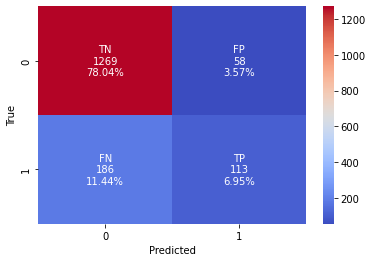

In [76]:
from sklearn.metrics import confusion_matrix

# 오른쪽 위 : 1종 오류 - 실제 틀린데 (0) 맞다고 예측 (1) - 68
# 왼쪽 아래 : 2종 오류 - 실제 맞는데 (1) 틀리다고 예측 (0) - 147
print(confusion_matrix(y_test, test_pred))
cf_matrix = confusion_matrix(y_test, test_pred)
cf_matrix
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()
# TP(양성을 양성으로 판단)
# FN(양성을 음성으로 판단) -> 2종 오류 (맞는데 틀리다고)
# FP(음성을 양성으로 판단) -> 1종 오류 (틀린데 맞다고)
# TN(음성을 음성으로 판단) 

# 📉 분류 리포트 (Classification Report)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1327
           1       0.66      0.38      0.48       299

    accuracy                           0.85      1626
   macro avg       0.77      0.67      0.70      1626
weighted avg       0.83      0.85      0.83      1626



## 🧪 예측값 유형
* 0 : match가 성사되지 않은 경우
* 1 : match가 성사된 경우 (분석 대상이 되는 쪽)

* precision : 정밀도
* recall : 재현율
* f1-score : f1 점수

### 🥽 정밀도(precision)
* 1로 예측한 경우 중, 얼마만큼이 실제로 1인지를 나타냄<br>
$TP\over(TP+FP)$
=
$\frac{양성을 양성으로 판단}{양성을 양성으로 판단 + 1종 오류}$
=
$\frac{양성을 양성으로 판단}{양성으로 판단한 수}$
> FP가 커질수록 분모가 커지기 때문에 정밀도는 낮아짐 (1종 오류와 관련)

* 1종 오류 / 위양성 / 아닌데 맞다고 / 안 걸렸는데 걸렸다고 나옴
* 정밀도가 높아지려면 0인데 1로 잘못 분류한게 적어져야함

### 🧬 재현율(recall)
* 실제로 1 중에, 얼마만큼을 1로 예측했는지 나타냄<br>
$TP\over(TP+FN)$
=
$\frac{양성을 양성으로 판단}{양성을 양성으로 판단 + 2종 오류}$
=
$\frac{양성을 양성으로 판단}{실제로 양성인 수}$
> FN가 커질수록 분모가 커지기 때문에 재현율은 낮아짐 (2종 오류와 관련)

* 2종 오류 : 맞는데 아니라고 / 걸렸는데 안걸렸다고..
* 재현율이 높아지려고 하면 : 실제로는 1인데 0으로 잡히는 위음성이 줄어들어야하

### 📟 F-1점수(f-score)
* 정밀도와 재현율의 조화평균<br>
* 조화평균 : 주어진 수들의 역수의 산술평균의 역수
    * 예) $H = \frac{2a_1a_2}{a_1 + a_2}$

$2 \times \frac{precision \times recall}{precesion + recall}$
=
$2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}$

> 🎄1종 오류가 중요하면 정밀도, 2종 오류가 중요하면 재현율<br>
> 딱히 중요한 것 없으면 F1-점수

# 🚀 하이퍼 파라미터 튜닝

## 🛬 경사하강법
* 머신 러닝이 학습시킬 때 최소의 오차를 찾는 방법
* 오차 함수에 대한 경사도(미분계수)를 기준으로 매개변수를 반복적으로 이동해가며 최소 오차를 찾음
* 매개변수? : 선형 회귀에서의 계수(변수에 대한 기울기 값)에 해당

**경사하강법과 보폭**
* 경사부스팅의 핵심개념 중 하나로, 모델이 어떻게 최소 오차가 되는 매개변수들을 학습하는지에 대한 방법
* 오차식에 대한 미분계수를 통해 매개 변수의 이동 방향과 보폭을 결정
* 보폭은 매개변수를 얼만큼씩 이동할지를 의미

**미분계수**
* 평균변화율에서 x의 증가량을 0으로 가깝게 할 때의 평균변화율
* 그래프 상에서 접선의 기울기, 계수

* learning_rate
    * 경사하강법에서 ‘매개변수’를 얼만큼씩 이동해가면서 최소 오차를 찾을지, 그 보폭의 크기를 결정하는 하이퍼파라미터.
    * 기본적으로 보폭은 미분계수에 의해 결정되지만, learning_rate를 크게 하면 더 큰 보폭을, 작게 하면 그만큼 작은 보폭으로 움직임.
    * learning rate를 우리말로 학습률이라고 함
    * 학습률과 보폭 : 학습률은 입력, 보폭은 그 결과. 큰 학습률을 사용하면 결과적으로 보폭도 커짐
    * 너무 작은 학습률 -> 상당한 시간이 들고, 오버피팅 문제 일어남
    * 너무 큰 학습률 -> 학습이 제대로 안 됨
    * 적절한 크기의 학습률을 사용해야만 큰 시간을 들이지 않고 최소 오차 지점을 찾을 수 있음
* max_depth : 각 트리의 깊이를 제한
* subsample : 모델을 학습시킬 때 일부 데이터만 사용하여 각 트리를 만듬.
 0.5를 쓰면 데이터의 절반씩만 랜덤 추출하여 트리를 만듬. 이 또한 오버피팅을 방지하는 데 도움이 됨
* n_estimators : 전체 나무의 개수.

# ✅ 그리드 서치 (Grid search CV)
- 격자탐색 교차검증

* 하이퍼 패러미터 튜닝
    * 방법 1 : KNN for문으로 가능한 조합을 다 넣어봄 -> 학습이 빠르고, 데이터가 적을 경우
    * 방법 2 : 직관에 의지. 반복해서 하다보면 늘어나는 인지력
    * 방법 3 : default값

------------------------------------------------------------
* 일반적인 몇 가지 수치들을 가지고 조합을 만들어보자
    * 방법 4 : grid - 격자 처리

In [79]:
# 학습률 : learning_rate
# max_depth, subsample, nestimators
# dictionary
parameter = {
    'learning_rate': [0.01, 0.1, 0.3], # 학습에 쓰이는 매개변수를 조절해서 최소 오차 허용을 조작 -> 보폭 수정
    'max_depth': [5, 7, 10], # 트리의 깊이 제한 (오버피팅)
    'subsample': [0.5, 0.7, 1], # 학습할 때 데이터 전체 쓰는 게 아니라, subsample 비율에 따라서 부분만 추출
    'n_estimators': [300, 500, 1000] # 3의 4승인 81개
}

In [80]:
# 그리드 서치 패키지
# 호출

from sklearn.model_selection import GridSearchCV

In [81]:
model = xgb.XGBClassifier()

In [82]:
# 모델, 패러미터 dictionary, n_jobs(최대로), scoring='f1', cv=5

# cv = cross validation : kfold와 동일한 folding(교차검증) 기능입니다.
gs_model = GridSearchCV(
    # n_jobs : CPU 개수 (-1 : 최대로 사용 colab 2개)
    # scoring : grid별로 모델이 만들어지는 것으로, 해당 모델 간의 비교를 진행
    # cv : 얼마나 나눠서 평균치를 구해줄거냐 (Kfold에서의 K개)
    model, parameter, n_jobs=-1, scoring='f1', cv=5
)

In [83]:
# 주의 (시간 다수 소요)
gs_model.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
gs_model.fit(X_train, y_train)

In [107]:
# 학습률 : learning_rate
# max_depth, subsample, nestimators
# dictionary
# parameter = {
#     'learning_rate': [0.01, 0.1, 0.3], # 학습에 쓰이는 매개변수를 조절해서 최소 오차 허용을 조작 -> 보폭 수정
#     'max_depth': [5, 7, 10], # 트리의 깊이 제한 (오버피팅)
#     'subsample': [0.5, 0.7, 1], # 학습할 때 데이터 전체 쓰는 게 아니라, subsample 비율에 따라서 부분만 추출
#     'n_estimators': [300, 500, 1000] # 트리 개수 3^4 = 81
# }
parameter = {
    'learning_rate': [0.3],
    'max_depth': [5],
    'subsample': [0.5],
    'n_estimators': [200]
}

In [108]:
model = xgb.XGBClassifier()

In [109]:
# 모델, 패러미터 dict, n_jobs, scoring='f1', cv=5
# cv = kfold -> folding
# Cross Validation
gs_model = GridSearchCV(
    # n_jobs : CPU 개수 (-1 : 최대로.. colab 2개)
    # scoring : grid별로 모델이 만들어지는 셈 => 모델 간의 비교를? 
    # cv : 얼마나 나눠서 평균치를 구해줄거냐 (Kfold에서의 k)
    model, parameter, n_jobs=-1, scoring='f1', cv=5
)

In [110]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [5],
                         'n_estimators': [200], 'subsample': [0.5]},
             scoring='f1')

In [96]:
gs_model.best_score_ # 최적합 점수

0.49264186930391196

In [97]:
gs_model.best_params_ # 최적합 패러미터

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [98]:
pred = gs_model.predict(X_test)

In [111]:
print(f"accuracy_score : {accuracy_score(y_test, pred)}")
print(classification_report(y_test, pred))

accuracy_score : 0.8437884378843789
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1327
           1       0.61      0.41      0.49       299

    accuracy                           0.84      1626
   macro avg       0.74      0.68      0.70      1626
weighted avg       0.83      0.84      0.83      1626



# 중요 변수 확인

In [94]:
model = xgb.XGBClassifier(learning=0.3, max_depth=5,
                          n_estimators=1000, subsample=0.5, random_state=23)
model.fit(X_train, y_train)

XGBClassifier(learning=0.3, max_depth=5, n_estimators=1000, random_state=23,
              subsample=0.5)

In [95]:
# 중요 변수
# xgboost -> feature_importances_
model.feature_importances_

array([0.01760021, 0.01501449, 0.01416286, 0.01533528, 0.01488405,
       0.01654684, 0.01581635, 0.01767105, 0.01498504, 0.01438092,
       0.01560507, 0.03943677, 0.01510202, 0.01585863, 0.03620599,
       0.0146331 , 0.0242062 , 0.01704355, 0.01568424, 0.01994622,
       0.01570059, 0.01600581, 0.01635921, 0.02759568, 0.01421915,
       0.01508113, 0.01949399, 0.01354421, 0.01864126, 0.01382447,
       0.01541893, 0.01769265, 0.05776444, 0.02518668, 0.02217493,
       0.0162079 , 0.01450639, 0.01088743, 0.01445954, 0.01503858,
       0.01386388, 0.01536773, 0.01598035, 0.01474136, 0.01534016,
       0.01636288, 0.02520617, 0.01525045, 0.02762747, 0.0266438 ,
       0.01414295, 0.01416163, 0.01832073, 0.01706861], dtype=float32)

In [100]:
feature_imp = pd.DataFrame({
    'features': X_train.columns,
    'values': model.feature_importances_,
})

In [101]:
pd.options.display.float_format = '{:.6f}'.format
feature_imp.head()

,features,values
0,has_null,0.017600
1,age,0.015014
2,age_o,0.014163
3,importance_same_race,0.015335
4,importance_same_religion,0.014884


In [102]:
feature_imp.sort_values(by='values', ascending=False)

,features,values
32,like,0.057764
11,attractive_o,0.039437
14,funny_o,0.036206
48,race_Latino/HispanicAmerican,0.027627
23,attractive_partner,0.027596
49,race_Other,0.026644
46,race_Black/AfricanAmerican,0.025206
33,guess_prob_liked,0.025187
16,shared_interests_o,0.024206
34,met,0.022175


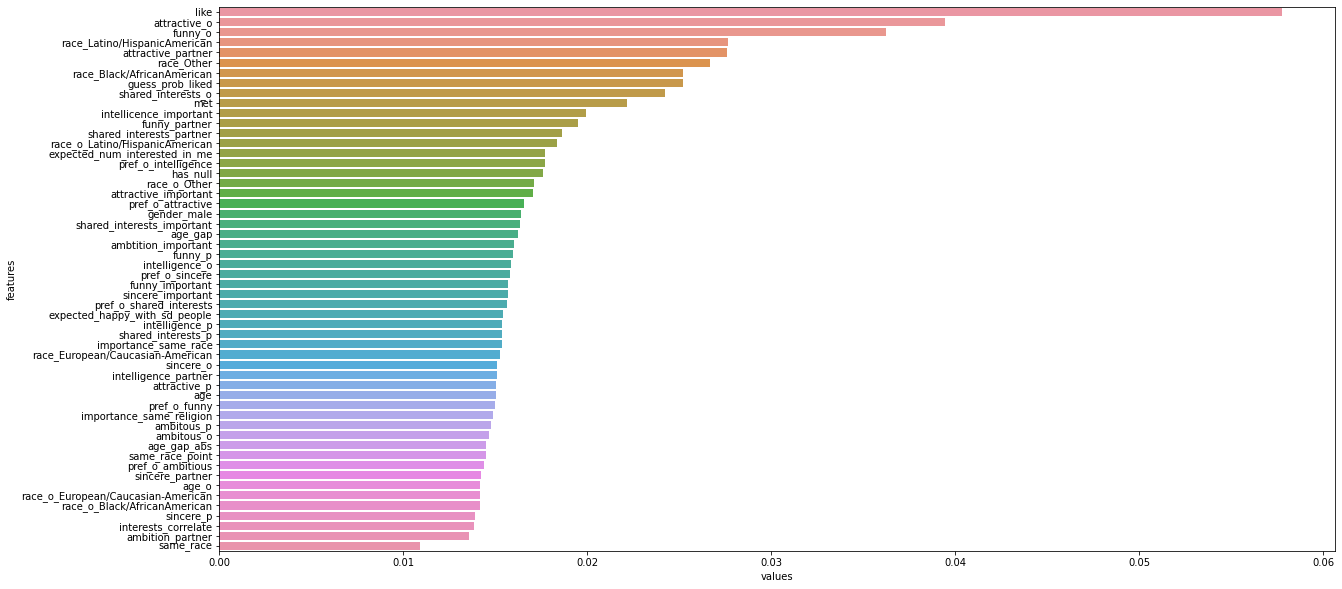

In [105]:
# 선호 영향도의 시각화
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data= feature_imp.sort_values(by='values', ascending=False))

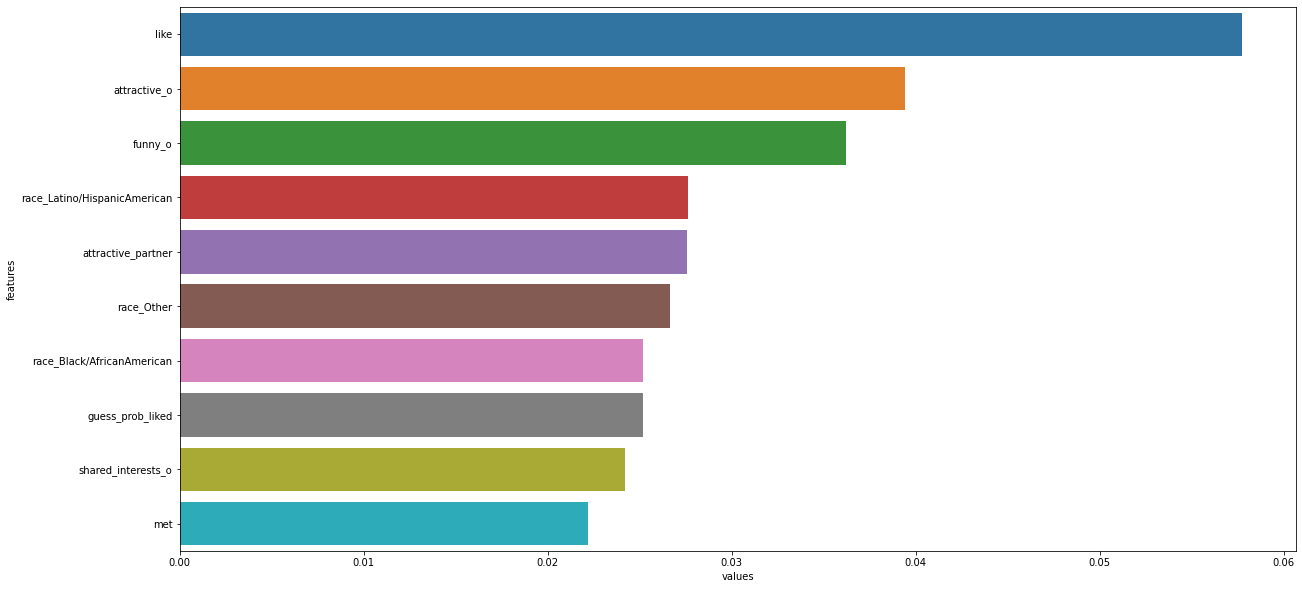

In [106]:
# 상위 10개의 영향도 높은 변수들
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data= feature_imp.sort_values(by='values', ascending=False).head(10))
plt.show()
